# B"H




# What is the True Normal Human Body Temperature? 

#### Background
- The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. 
- But, is this value statistically correct?


In [45]:
import os
import sys

import math

import numpy as np
import pandas as pd

from scipy import stats

import matplotlib.pyplot as plt

import seaborn as sns

---
## Set the plot output sizes

In [2]:
# Get current size
fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print ("Prior size:", fig_size)
 
# Set figure width to 12 and height to 9
fig_size[0] = 12
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size

print ("Current size:", fig_size)

Prior size: [6.0, 4.0]
Current size: [12, 9]


---
## Get project info

In [3]:
NOTEBOOKS_DIR = os.path.join(os.pardir)

print(os.path.abspath(NOTEBOOKS_DIR))

/home/laz/repos/springboard-mini-projects/notebooks


In [4]:
PROJ_ROOT = os.path.join(NOTEBOOKS_DIR,os.pardir)

print(os.path.abspath(PROJ_ROOT))

/home/laz/repos/springboard-mini-projects


In [5]:
# add the 'src' directory as one where we can import modules
SRC_DIR = os.path.join(PROJ_ROOT, 'src')
sys.path.append(SRC_DIR)

print(os.path.abspath(SRC_DIR))

/home/laz/repos/springboard-mini-projects/src


In [6]:
# Load the "autoreload" extension
%load_ext autoreload

# always reload modules marked with "%aimport"
%autoreload 1

# import my method from the source code
%aimport helper_functions
import helper_functions as hf

---
## Import the data:

In [7]:
temp_df = hf.read_csv(
    p_dir       = hf.DATA_DIR,
    p_file_name = 'human_body_temperature.csv'
)

temp_df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [8]:
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB


In [9]:
temp_df['gender'].unique()

array(['F', 'M'], dtype=object)

In [10]:
temp_df.describe()

,temperature,heart_rate
count,130.000000,130.000000
mean,98.249231,73.761538
std,0.733183,7.062077
min,96.300000,57.000000
25%,97.800000,69.000000
50%,98.300000,74.000000
75%,98.700000,79.000000
max,100.800000,89.000000


In [11]:
temp_vals = temp_df['temperature'].values

temp_f_vals = temp_df[temp_df['gender'] == 'F']['temperature'].values
temp_m_vals = temp_df[temp_df['gender'] == 'M']['temperature'].values

In [12]:
# Compute mean and standard deviation:

mu      = np.mean(temp_vals)
sigma   = np.std(temp_vals)

f_mu    = np.mean(temp_f_vals)
f_sigma = np.std(temp_f_vals)

m_mu    = np.mean(temp_m_vals)
m_sigma = np.std(temp_m_vals)

# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

print("mean of temp (M&F)               :", mu)
print("standard deviation of temp (M&F) :", sigma)
print("-  -  -  -  -  -  -  -  -  -  -  -  -  ")
print("mean of temp (F)                 :", f_mu)
print("standard deviation of temp (F)   :", f_sigma)
print("-  -  -  -  -  -  -  -  -  -  -  -  -  ")
print("mean of temp (M)                 :", m_mu)
print("standard deviation of temp (M)   :", m_sigma)

mean of temp (M&F)               : 98.24923076923075
standard deviation of temp (M&F) : 0.730357778905038
-  -  -  -  -  -  -  -  -  -  -  -  -  
mean of temp (F)                 : 98.39384615384614
standard deviation of temp (F)   : 0.7377464486428966
-  -  -  -  -  -  -  -  -  -  -  -  -  
mean of temp (M)                 : 98.10461538461537
standard deviation of temp (M)   : 0.6933598841828699


---
## **Question 1**: is the distribution of body temperatures normal?


---

### Question 1 - Approach 1
### Check the normality of the distribution using histograms:

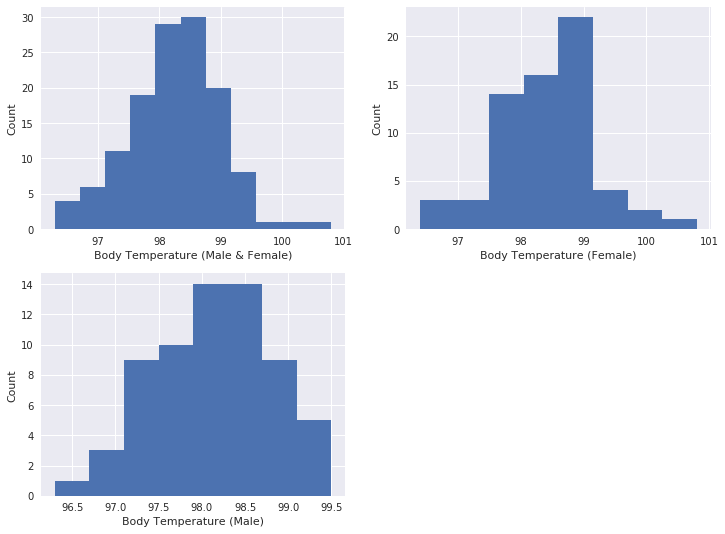

In [13]:
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# Set default Seaborn style
sns.set()
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~




# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# Create a figure with 2x2 subplot layout and make the top left subplot active
_ = plt.subplot(2, 2, 1)

_ = plt.hist(
    temp_vals, 
    bins=hf.get_srr_bins(temp_vals) # Get number of bins using the "square root rule"
)


# Label axes
_ = plt.xlabel('Body Temperature (Male & Female)')
_ = plt.ylabel('Count')
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~




# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
_ = plt.subplot(2, 2, 2)

_ = plt.hist(
    temp_f_vals, 
    bins=hf.get_srr_bins(temp_f_vals) # Get number of bins using the "square root rule"
)


# Label axes
_ = plt.xlabel('Body Temperature (Female)')
_ = plt.ylabel('Count')
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~




# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
_ = plt.subplot(2, 2, 3)

_ = plt.hist(
    temp_m_vals, 
    bins=hf.get_srr_bins(temp_m_vals) # Get number of bins using the "square root rule"
)


# Label axes
_ = plt.xlabel('Body Temperature (Male)')
_ = plt.ylabel('Count')
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~



# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# Show histograms
plt.show()
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

### Result:
- When plotting male and female together the histogram looks somewhat normal
- However, even in there the data is skewed to the left


---

### Question 1 - Approach 2
### Check the normality of the distribution using box plots:

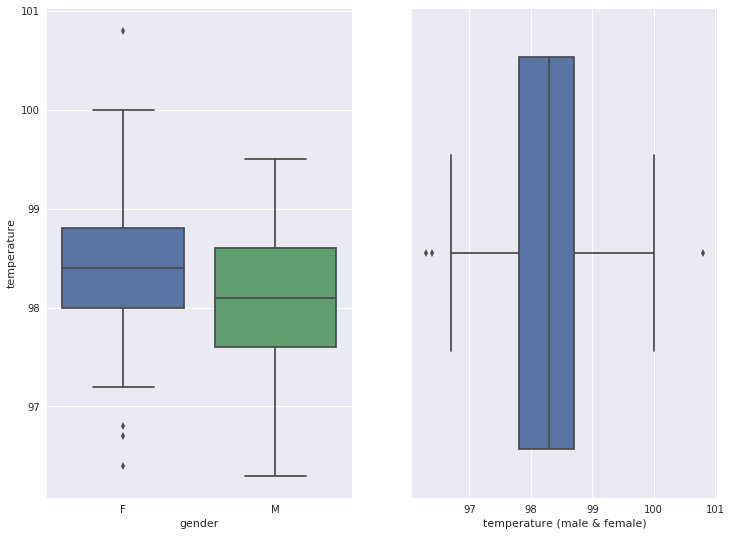

In [14]:
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# Create a figure with 1x2 subplot layout and make the left subplot active
_ = plt.subplot(1, 2, 1)

# Create box plot with Seaborn's default settings
_ = sns.boxplot(
    x    = 'gender', 
    y    = 'temperature', 
    data = temp_df
)

# Label the axes
_ = plt.xlabel('gender')
_ = plt.ylabel('temperature')
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~



# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
_ = plt.subplot(1, 2, 2)

# Create box plot with Seaborn's default settings
_ = sns.boxplot(
    x    = 'temperature',     
    data = temp_df
)

# Label the axes
_ = plt.xlabel('temperature (male & female)')
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~



# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# Show the plot
plt.show()
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

### Result:
- When plotting male and female together the box-plot looks appears more normal

---
### Question 1 - Approach 3
### Check the normality of the distribution using ECDF's:

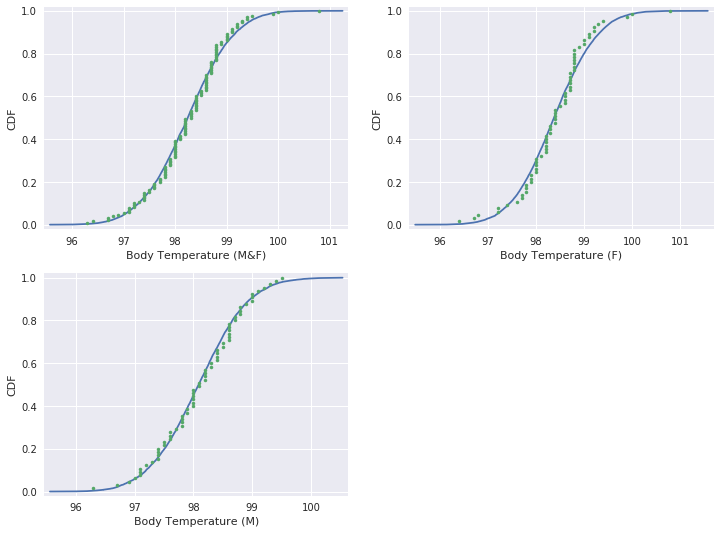

In [15]:
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# Create a figure with 2x2 subplot layout and make the top left subplot active
_ = plt.subplot(2, 2, 1)

# Sample out of a normal distribution with this mu and sigma:
samples = np.random.normal(mu, sigma, size=10000)

# Get the CDF of the samples and of the data
x_theor, y_theor = hf.ecdf(samples)
x, y             = hf.ecdf(temp_vals)

# Plot the CDFs and show the plot
_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x, y, marker='.', linestyle='none')

plt.margins(0.02)

_ = plt.xlabel('Body Temperature (M&F)')
_ = plt.ylabel('CDF')
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~




# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
_ = plt.subplot(2, 2, 2)

f_samples = np.random.normal(f_mu, f_sigma, size=10000)

# Get the CDF of the samples and of the data
x_theor, y_theor = hf.ecdf(f_samples)
x, y             = hf.ecdf(temp_f_vals)

# Plot the CDFs and show the plot
_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x, y, marker='.', linestyle='none')

plt.margins(0.02)

_ = plt.xlabel('Body Temperature (F)')
_ = plt.ylabel('CDF')
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~




# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
_ = plt.subplot(2, 2, 3)

m_samples = np.random.normal(m_mu, m_sigma, size=10000)

x_theor, y_theor = hf.ecdf(m_samples)
x, y             = hf.ecdf(temp_m_vals)

_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x, y, marker='.', linestyle='none')

plt.margins(0.02)

_ = plt.xlabel('Body Temperature (M)')
_ = plt.ylabel('CDF')
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


plt.show()

### Result:
- Looks for the most part normal when plotting M and F together.
- Although, at some points, it does moves away from the normal model

---
### Question 1 - Approach 4
### Check the normality of the distribution using Normal Probability Plots
- If the distribution of the sample is approximately normal, the result is a **straight line** with 
    - **intercept mu** 
    - **slope sigma**


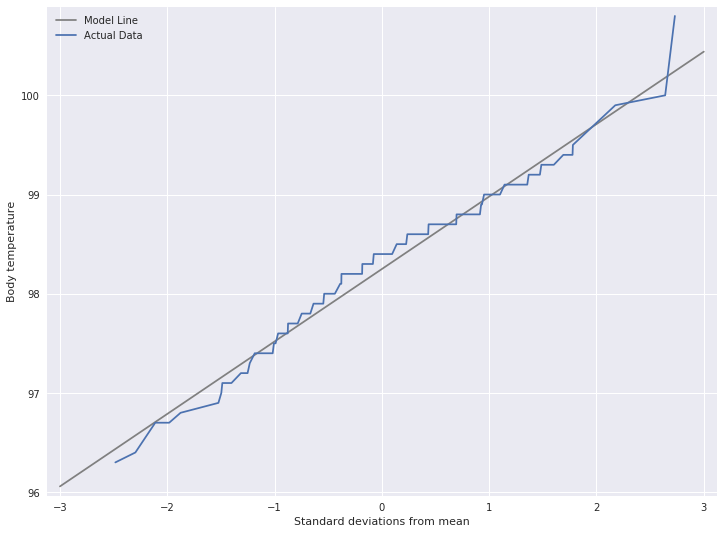

In [16]:
# -- ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~    
x_line, y_line = hf.get_x_y_for_line(
    bounds      = [-3, 3], 
    y_intercept = mu, 
    slope       = sigma
)
# -- ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~



# -- ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
x, y = hf.get_x_y_for_norm_plot(temp_vals)
# -- ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~



# -- ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
_ = plt.plot(
    x_line, 
    y_line, 
    color = 'gray', 
    label = 'Model Line'
)

_ = plt.plot(
    x, 
    y, 
    label = 'Actual Data')
# -- ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~



# -- ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
plt.margins(0.02)

_ = plt.legend(loc='upper left')
_ = plt.xlabel('Standard deviations from mean')
_ = plt.ylabel('Body temperature')

plt.show()
# -- ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

### Result:
- The curve matches the model near the mean but deviates in the tails.

---
## **Question 2.a**: Is the sample size large? 

### Answer: Yes
- To use CLT, rule of thumb is to have sample size > 30 or 50. 
- Sample size here is 130


## **Question 2.b**: Are the observations independent?
### Answer: Yes
- Each observation in the data is a measurement from a different person.
- One person's body temperature doesn't have an affect on another person's body temperature 

---
## **Question 3.a**: Is the true population mean really 98.6 degrees F?  
- Use bootstrap hypothesis test.

In [23]:
sample_mean = np.mean(temp_vals)

sample_mean

98.24923076923075

In [24]:
hypothesized_mean = 98.6

In [25]:
sample_shifted = temp_vals - sample_mean + hypothesized_mean

### Plot ECDF to check the impact:

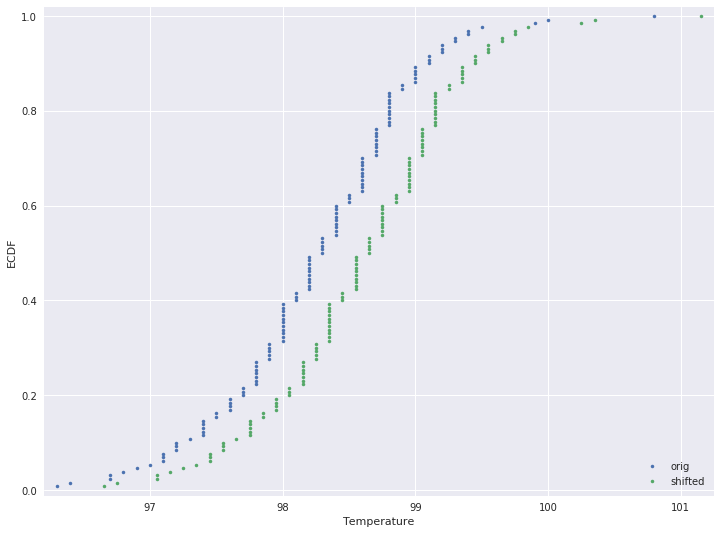

In [28]:
# Compute x,y values for ECDFs
x_orig,    y_orig    = hf.ecdf(temp_vals)
x_shifted, y_shifted = hf.ecdf(sample_shifted)

# Plot the ECDFs
plt.plot(x_orig,    y_orig,    marker='.', linestyle='none')
plt.plot(x_shifted, y_shifted, marker='.', linestyle='none')

# Set the margins
plt.margins(0.02)

# Add a legend
plt.legend(('orig', 'shifted'), loc='lower right')

# Label axes and show plot
plt.xlabel('Temperature')
plt.ylabel('ECDF')
plt.show()

### Null Hypothesis 
- The true mean temperature is 98.6.
- I.e. we would have actually gotten the same mean if we would have repeated our sample data collection lots and lots of times.


### The Test Statistic

In [30]:
def diff_from_hyp(data, hypothesized_mean = 98.6):
    return np.mean(data) - hypothesized_mean

In [32]:
diff_observed = diff_from_hyp(temp_vals)

print(diff_observed)

-0.35076923076924515


### Compute the p-value

In [37]:
bs_replicates = hf.draw_bootstrap_replicates(sample_shifted, diff_from_hyp, 10000)

In [38]:
p_value = np.sum(bs_replicates <= diff_observed) / 10000

p_value

0.0

### Plot the histogram

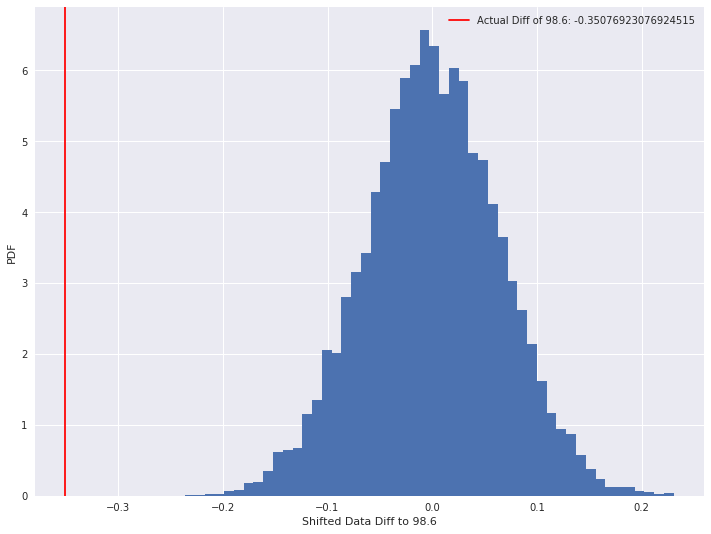

In [39]:
# Plot the histogram
_ = plt.hist(bs_replicates, bins=50, density=True)
_ = plt.xlabel('Shifted Data Diff to 98.6')
_ = plt.ylabel('PDF')


_ = plt.axvline(
    x     = diff_observed,
    color = 'red',
    label = 'Actual Diff of 98.6: '+str(diff_observed)
)

plt.legend(loc='upper right')

plt.show()

### Conclusion: null hypothesis is rejected.

---
## **Questions 3.b**: Is the true population mean really 98.6 degrees F?  
- Use frequentist statistical testing.

## Question: 
- Would you use a one-sample or two-sample test? Why?

## Answer: 
- We'll use a one-sample test being that we're comparing to a single value. 

## Question: 
- In this situation, is it appropriate to use the $t$ or $z$ statistic?

## Answer: 
- We'll use a t-statistic being that the population standard deviation is unknown. 
- Though a t-test is best for small samples, it becomes similar to the z-test with large samples, so the results shouldn't differ much.

--- 

### Single Sample t-test

In [47]:
hypothesized_mean = 98.6

sample_mean = np.mean(temp_vals)
sample_std  = np.std(temp_vals)
sample_size = 130

print(sample_mean, sample_std)

98.24923076923075 0.730357778905038


In [48]:
t = (sample_mean - hypothesized_mean) / (sample_std / math.sqrt(sample_size))

t

-5.4759252020785585

In [53]:
alpha = .01

left_tail_crit = alpha/2

right_tail_crit = 1 - (alpha/2)

df = sample_size - 1

print(left_tail_crit, right_tail_crit, df)

0.005 0.995 129


In [55]:
t_crit_left = stats.t.ppf(left_tail_crit, df)

t_crit_left

-2.6144786796997836

In [57]:
t_crit_right = stats.t.ppf(right_tail_crit, df)

t_crit_right

2.614478679699783

In [60]:
if t_crit_left <= t <= t_crit_right:
    print('Do not reject null hypothesis')
else:
    print('Reject null hypothesis')

Reject null hypothesis
